In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
data = pd.read_csv('5.csv')

In [6]:
print(data)

                                                 name   void fraction [widom]  \
0                  linker100_C_linker23_C_nfa_relaxed                0.857920   
1                linker100_C_linker58_C_dei-z_relaxed                0.910009   
2        linker100_CH_linker66_N_dei_relaxed_interp_2                0.903690   
3                 linker100_N_linker54_CH_uoo_relaxed                0.901190   
4                  linker101_C_linker77_C_kgm_relaxed                0.790229   
...                                               ...                     ...   
69835               linker99_C_linker48_C_kgm_relaxed                0.677114   
69836               linker99_C_linker71_C_kgm_relaxed                0.792062   
69837             linker99_CH_linker104_N_pts_relaxed                0.703789   
69838     linker99_CH_linker39_N_qtz_relaxed_interp_3                0.864280   
69839   linker99_NH_linker64_CH2_qtz_relaxed_interp_2                0.614569   

        density [kg/m^3]   

In [7]:
#selected_data = data.iloc[:, ~data.columns.isin([data.columns[0], data.columns[2]])]
selected_data = data.iloc[:, 1:]


In [8]:
print(selected_data)

        void fraction [widom]   density [kg/m^3]   surface area [m^2/g]  \
0                    0.857920         291.573057                5167.34   
1                    0.910009         222.853016                5898.77   
2                    0.903690         212.292686                6189.79   
3                    0.901190         241.226017                6692.38   
4                    0.790229         402.214408                5341.88   
...                       ...                ...                    ...   
69835                0.677114         484.689046                3092.58   
69836                0.792062         426.037961                5226.51   
69837                0.703789         521.543027                3621.24   
69838                0.864280         299.286593                5113.72   
69839                0.614569         628.559266                3143.22   

        deliverable capacity [v STP/v]   num carbon   num fluorine  \
0                           1

In [9]:
numpy_array = selected_data.to_numpy()

In [10]:
print (numpy_array)

[[8.57920000e-01 2.91573057e+02 5.16734000e+03 ... 2.12316000e+01
  1.69214300e+01 2.12316000e+01]
 [9.10009000e-01 2.22853016e+02 5.89877000e+03 ... 2.15981300e+01
  1.70633200e+01 2.15977900e+01]
 [9.03690000e-01 2.12292686e+02 6.18979000e+03 ... 2.43499300e+01
  2.13819600e+01 2.43461800e+01]
 ...
 [7.03789000e-01 5.21543027e+02 3.62124000e+03 ... 1.13618200e+01
  1.01446700e+01 1.13618100e+01]
 [8.64280000e-01 2.99286593e+02 5.11372000e+03 ... 2.56712000e+01
  2.42882000e+01 2.56635100e+01]
 [6.14569000e-01 6.28559266e+02 3.14322000e+03 ... 6.19462000e+00
  5.13620000e+00 6.18312000e+00]]


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
x = StandardScaler().fit_transform(numpy_array)

In [13]:
print(x[0])

[-0.003784    0.41740778 -1.1748364   0.47304995  0.31137451 -0.03500433
 -0.11796414 -0.31266865  2.25026968 -0.06138946 -0.15889355 -0.34656652
 -0.11667871  0.90525228 -0.34406928 -0.32946139 -0.32502527]


In [14]:
print(x)

[[-0.003784    0.41740778 -1.1748364  ... -0.34406928 -0.32946139
  -0.32502527]
 [-0.003784   -0.11671913 -0.59261051 ... -0.31414255 -0.3158792
  -0.29514701]
 [-0.003784   -0.19879935 -0.36095557 ... -0.08946139  0.09751579
  -0.07089977]
 ...
 [-0.003784    2.20485068 -2.40554808 ... -1.14992494 -0.97815604
  -1.13032335]
 [-0.003784    0.47736129 -1.21751848 ...  0.01841872  0.37571103
   0.03658411]
 [-0.003784    3.03663501 -2.78605697 ... -1.5718206  -1.45758391
  -1.55286416]]


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)

In [17]:
newX = pca.fit_transform(x) 

In [18]:
print(newX)

[[-1.2492979   0.81086354]
 [-0.41741749  0.69305004]
 [-0.64261553  5.01675606]
 ...
 [-3.48577353 -0.57410641]
 [-0.49271685 -1.52153736]
 [-3.99311176 -0.4386715 ]]


In [19]:
np.savetxt('5_PCA.csv',newX, delimiter=',')

In [37]:
print (newX[0])

[-1.24928932  0.81082215]


In [ ]:
plt.figure( )
for i in newX:
    plt.scatter(i[0],i[1],s=20,c="red")
plt.title("PCA")#显示标题
plt.show()

In [20]:
invX = pca.inverse_transform(newX)

In [21]:
print(invX[0])

[ 0.00297319  0.54232265 -0.49786853  0.44196543  0.50332535  0.04417385
  0.47215286  0.46060938  0.31783933  0.05717356  0.07402318  0.08935087
  0.21867383  0.17051666 -0.4323534  -0.46960945 -0.43408331]


In [22]:
print(invX)

[[ 0.00297319  0.54232265 -0.49786853 ... -0.4323534  -0.46960945
  -0.43408331]
 [ 0.00268952  0.19627527 -0.20570896 ... -0.09124023 -0.13377617
  -0.09296831]
 [ 0.02001108  0.44320928 -0.68498381 ...  0.3574999   0.01048333
   0.34407823]
 ...
 [-0.00310176  1.41189057 -1.12465389 ... -1.56396156 -1.46572932
  -1.56106007]
 [-0.006226    0.1481373  -0.02466373 ... -0.40266146 -0.28610899
  -0.39832698]
 [-0.00267327  1.62520472 -1.30876182 ... -1.76397973 -1.66705956
  -1.76125259]]


In [23]:
print(pca.explained_variance_ratio_)

[0.27516226 0.18264209]


In [35]:
pca.components_

array([[ 2.28058810e-04, -4.10924929e-01,  3.37998346e-01,
        -3.77840496e-01, -7.62008892e-02, -1.94526746e-02,
        -6.92105423e-02, -9.23380757e-02, -8.61334975e-02,
        -2.03359310e-02, -3.76860622e-02, -2.97251119e-02,
         2.31989544e-02,  9.36877327e-02,  4.27905627e-01,
         4.11464130e-01,  4.27521973e-01],
       [ 4.01806236e-03,  3.57088409e-02, -9.32436863e-02,
        -3.70838090e-02,  5.03324806e-01,  2.45067887e-02,
         4.75651273e-01,  4.25782630e-01,  2.59270419e-01,
         3.91778932e-02,  3.32263776e-02,  6.43947435e-02,
         3.05422821e-01,  3.54634946e-01,  1.26073243e-01,
         5.47956826e-02,  1.23348730e-01]])

<Figure size 3000x3000 with 0 Axes>

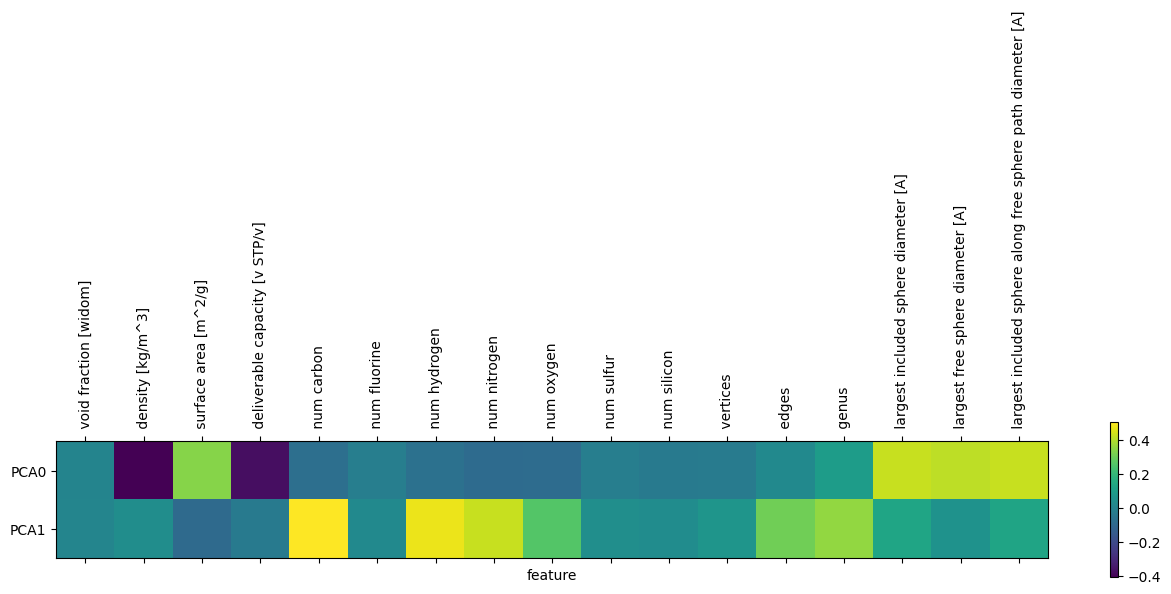

In [51]:
plt.figure(figsize=(30,30))
plt.matshow(pca.components_)
plt.yticks([0,1],["PCA0","PCA1"])###横坐标轴刻度
plt.colorbar()
import matplotlib.pyplot as plt

selected_columns = [col.split(' ', 1)[0] for col in selected_data.columns[:1]]
plt.xticks(range(len(selected_data.columns)), selected_data.columns, fontsize=10, rotation=90)
#plt.xticks(range(len(list(selected_data.columns))),selected_data.columns,fontsize=10)###纵坐标轴刻度
plt.xlabel('feature')###横坐标轴标题
plt.savefig('plot.png', dpi=3000, bbox_inches='tight') 
#plt.ylabel('1')###纵坐标轴标题

<Figure size 3000x3000 with 0 Axes>

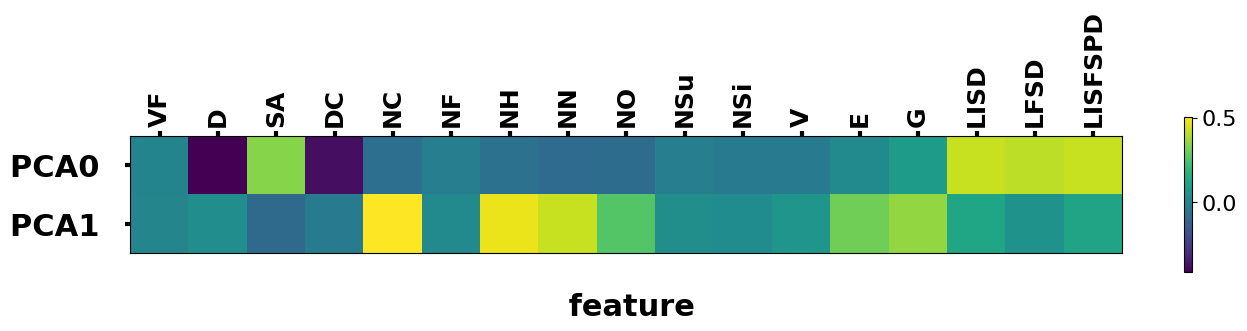

In [149]:
import matplotlib.pyplot as plt
import re
plt.figure(figsize=(30, 30))
plt.matshow(pca.components_)
plt.yticks([0, 1], ["PCA0  ", "PCA1  "], fontsize=22,weight='bold')
#plt.colorbar()
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)  # 

plt.tick_params(axis='x', which='both', top=True, bottom=False, width=3)
plt.tick_params(axis='y', which='both', left=True, right=False, width=3)
selected_columns = [re.sub(r'\[.*?\]', '', col).strip() for col in selected_data.columns]


selected_columns[-17:] = ["VF","D","SA","DC","NC","NF","NH","NN","NO","NSu","NSi","V","E","G","LISD", "LFSD", "LISFSPD"]
plt.xticks(range(len(selected_columns)), selected_columns, fontsize=18, rotation=90,weight='bold')
plt.xlabel('\n', fontsize=22,weight='bold')
plt.xlabel('\n feature', fontsize=22,weight='bold')
plt.ylabel('', fontsize=20,weight='bold')


plt.savefig('plot.png', dpi=500, bbox_inches='tight')


In [24]:
k1_spss = pca.components_.T 

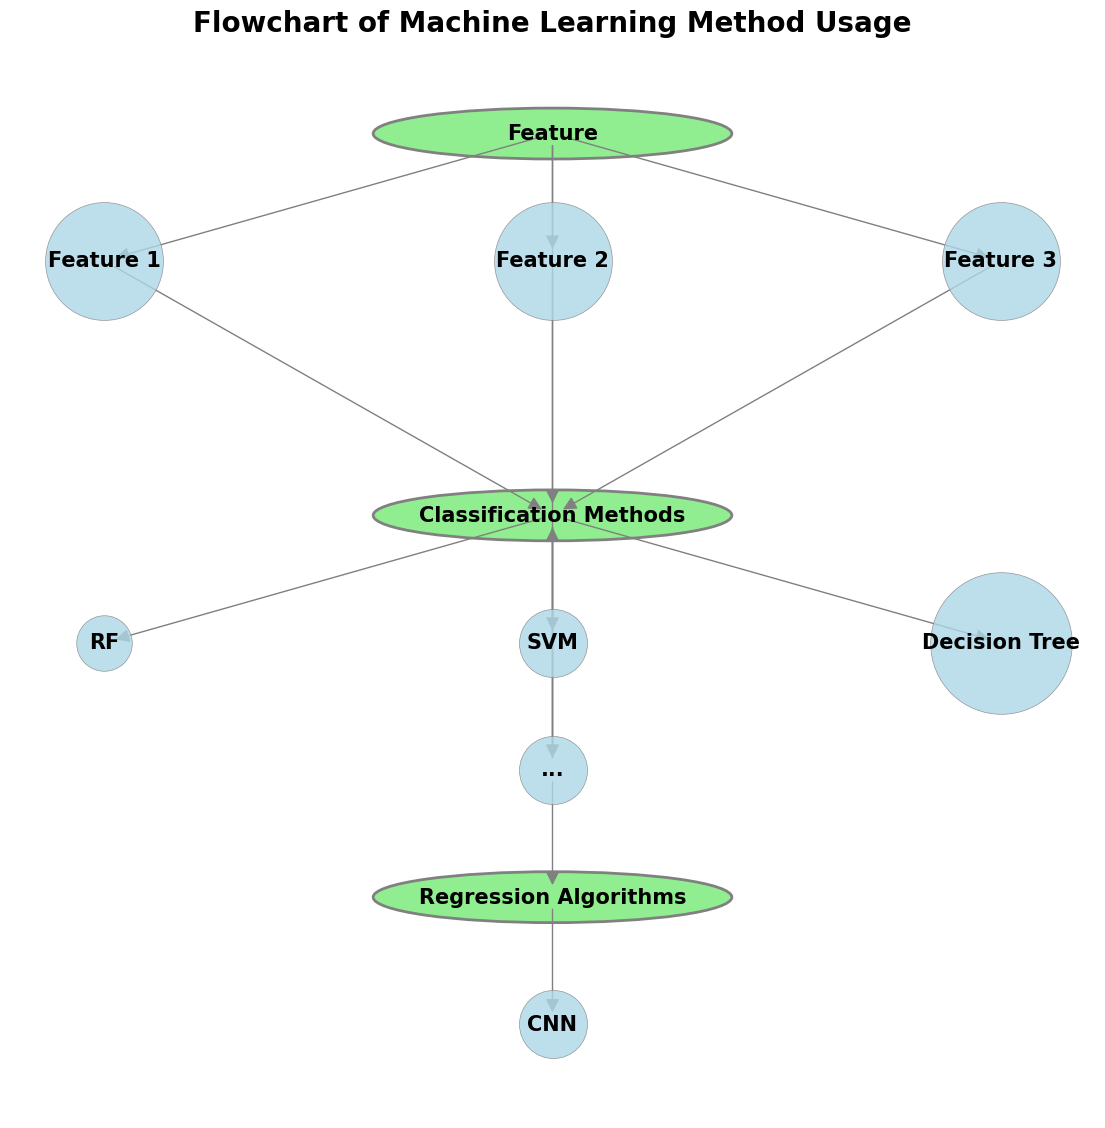

In [148]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Ellipse

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_node("Feature")
G.add_node("Feature 1")
G.add_node("Feature 2")
G.add_node("Feature 3")
G.add_node("...")
G.add_node("Classification Methods")
G.add_node("RF")
G.add_node("SVM")
G.add_node("Decision Tree")
G.add_node("...")
G.add_node("Regression Algorithms")
G.add_node("CNN")

# 添加边
G.add_edge("Feature", "Feature 1")
G.add_edge("Feature", "Feature 2")
G.add_edge("Feature", "Feature 3")
G.add_edge("Feature", "...")
G.add_edge("Feature 1", "Classification Methods")
G.add_edge("Feature 2", "Classification Methods")
G.add_edge("Feature 3", "Classification Methods")
G.add_edge("...", "Classification Methods")
G.add_edge("Classification Methods", "RF")
G.add_edge("Classification Methods", "SVM")
G.add_edge("Classification Methods", "Decision Tree")
G.add_edge("Classification Methods", "...")
G.add_edge("...", "Regression Algorithms")
G.add_edge("Regression Algorithms", "CNN")

def calculate_node_size(label):
    return len(label) * 400

pos = {
    "Feature": (0, 3),
    "Feature 1": (-1, 2),
    "Feature 2": (0, 2),
    "Feature 3": (1, 2),
    "...": (0, 1),
    "Classification Methods": (0, 0),
    "RF": (-1, -1),
    "SVM": (0, -1),
    "Decision Tree": (1, -1),
    "...": (0, -2),
    "Regression Algorithms": (0, -3),
    "CNN": (0, -4)
}

plt.figure(figsize=(14, 14))

node_sizes = [calculate_node_size(node) for node in G.nodes()]
node_shapes = ["ellipse" if node in ["Classification Methods", "Regression Algorithms","Feature"] else "o" for node in G.nodes()]
node_colors = ['lightblue' if node not in ["Classification Methods", "Feature", "Regression Algorithms"] else 'lightgreen' for node in G.nodes()]

for node, size, shape, color in zip(G.nodes(), node_sizes, node_shapes, node_colors):
    if shape == "o":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_shape="o", node_size=size*2, node_color=color,
                               alpha=0.8, linewidths=0.5, edgecolors='gray')
    elif shape == "ellipse":
        ell = Ellipse((pos[node][0], pos[node][1]), width=0.8, height=0.4, facecolor=color, edgecolor='gray', lw=2)
        plt.gca().add_patch(ell)

nx.draw_networkx_edges(G, pos, edge_color="gray", arrowsize=20)

nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold',
                        font_color='black', font_family='Arial')

plt.title("Flowchart of Machine Learning Method Usage", fontweight='bold', fontsize=20)
plt.axis('off')
plt.box(False)
plt.savefig("flowchart.png", dpi=300)
plt.show()



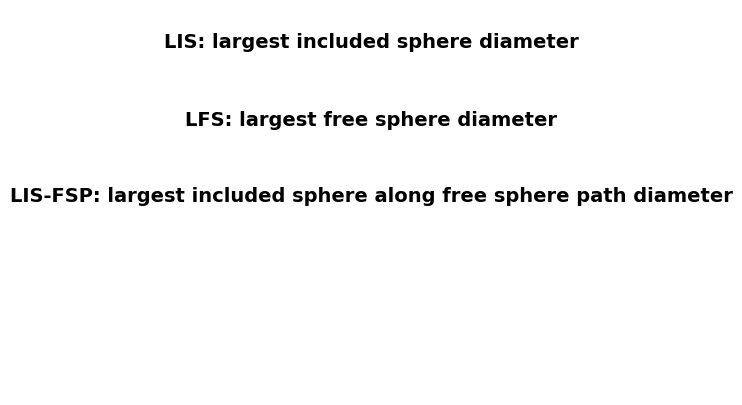

In [103]:
import matplotlib.pyplot as plt

abbreviations = ['LIS', 'LFS', 'LIS-FSP']
descriptions = ['largest included sphere diameter', 'largest free sphere diameter', 'largest included sphere along free sphere path diameter']

# 创建一个空的图形对象
fig, ax = plt.subplots(figsize=(8, 5))

# 隐藏坐标轴
ax.axis('off')

# 设置文本的位置和内容
for i in range(len(abbreviations)):
    text = f"{abbreviations[i]}: {descriptions[i]}"
    ax.text(0.5, 0.9 - i*0.2, text, transform=ax.transAxes, ha='center', fontsize=14, fontweight='bold')
    
plt.show()


In [25]:
weight = (np.dot(k1_spss, pca.explained_variance_ratio_)) / np.sum(pca.explained_variance_ratio_)

In [26]:
print('weight:',weight)

weight: [ 0.00174009 -0.23273937  0.16595335 -0.24189484  0.15500221 -0.00191495
  0.14816332  0.11436736  0.05166618  0.00340725 -0.00939538  0.00782422
  0.13579281  0.19779322  0.30748891  0.26917044  0.30617136]


In [27]:
weighted_weight = weight/np.sum(weight)
print('weighted_weight:', weighted_weight)

weighted_weight: [ 0.00126222 -0.16882345  0.12037851 -0.17546461  0.11243482 -0.00138906
  0.10747406  0.08295929  0.03747739  0.00247153 -0.00681518  0.0056755
  0.09850079  0.14347437  0.22304494  0.19524966  0.22208923]


In [28]:
import sklearn
from sklearn.manifold import TSNE

In [29]:
# Random state.
RS = 20150101

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

In [31]:
tsne = TSNE(n_components = 2)

In [32]:
tsne.fit_transform(x)

array([[ -9.140357 ,  20.072323 ],
       [-26.118477 ,  41.314404 ],
       [  7.9442005, -14.276736 ],
       ...,
       [ 48.486572 ,  14.402844 ],
       [ 21.839064 , -31.057762 ],
       [ 27.19087  ,  10.829115 ]], dtype=float32)

In [33]:
print(tsne.embedding_)

[[ -9.140357   20.072323 ]
 [-26.118477   41.314404 ]
 [  7.9442005 -14.276736 ]
 ...
 [ 48.486572   14.402844 ]
 [ 21.839064  -31.057762 ]
 [ 27.19087    10.829115 ]]


In [34]:
np.savetxt('3.csv', tsne.embedding_, delimiter=',')

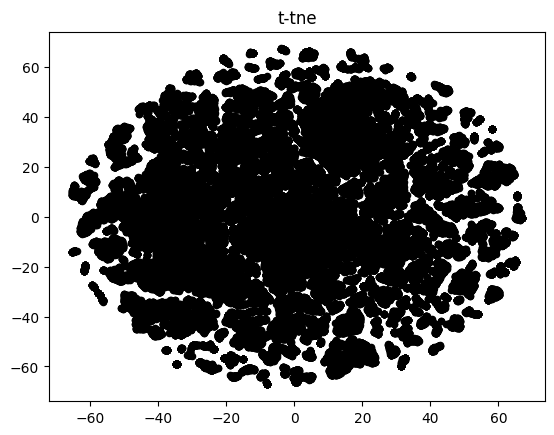

In [35]:
plt.figure( )
for i in tsne.embedding_:
    plt.scatter(i[0],i[1],s=20,c="black")
plt.title("t-tne")#显示标题
plt.show()